# Домашнее задание «Деревья решений»

Для выполнения домашнего задания необходимо взять файл boston house-prices datase (sklearn.datasets.load_boston) и построить модель.

По аналогии задания к лекции «Классификация: Логистическая регрессия и SVM».
А именно построить модель регрессии, дерево решений, оптимизировать параметры и сравнить результаты.

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([X,y], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


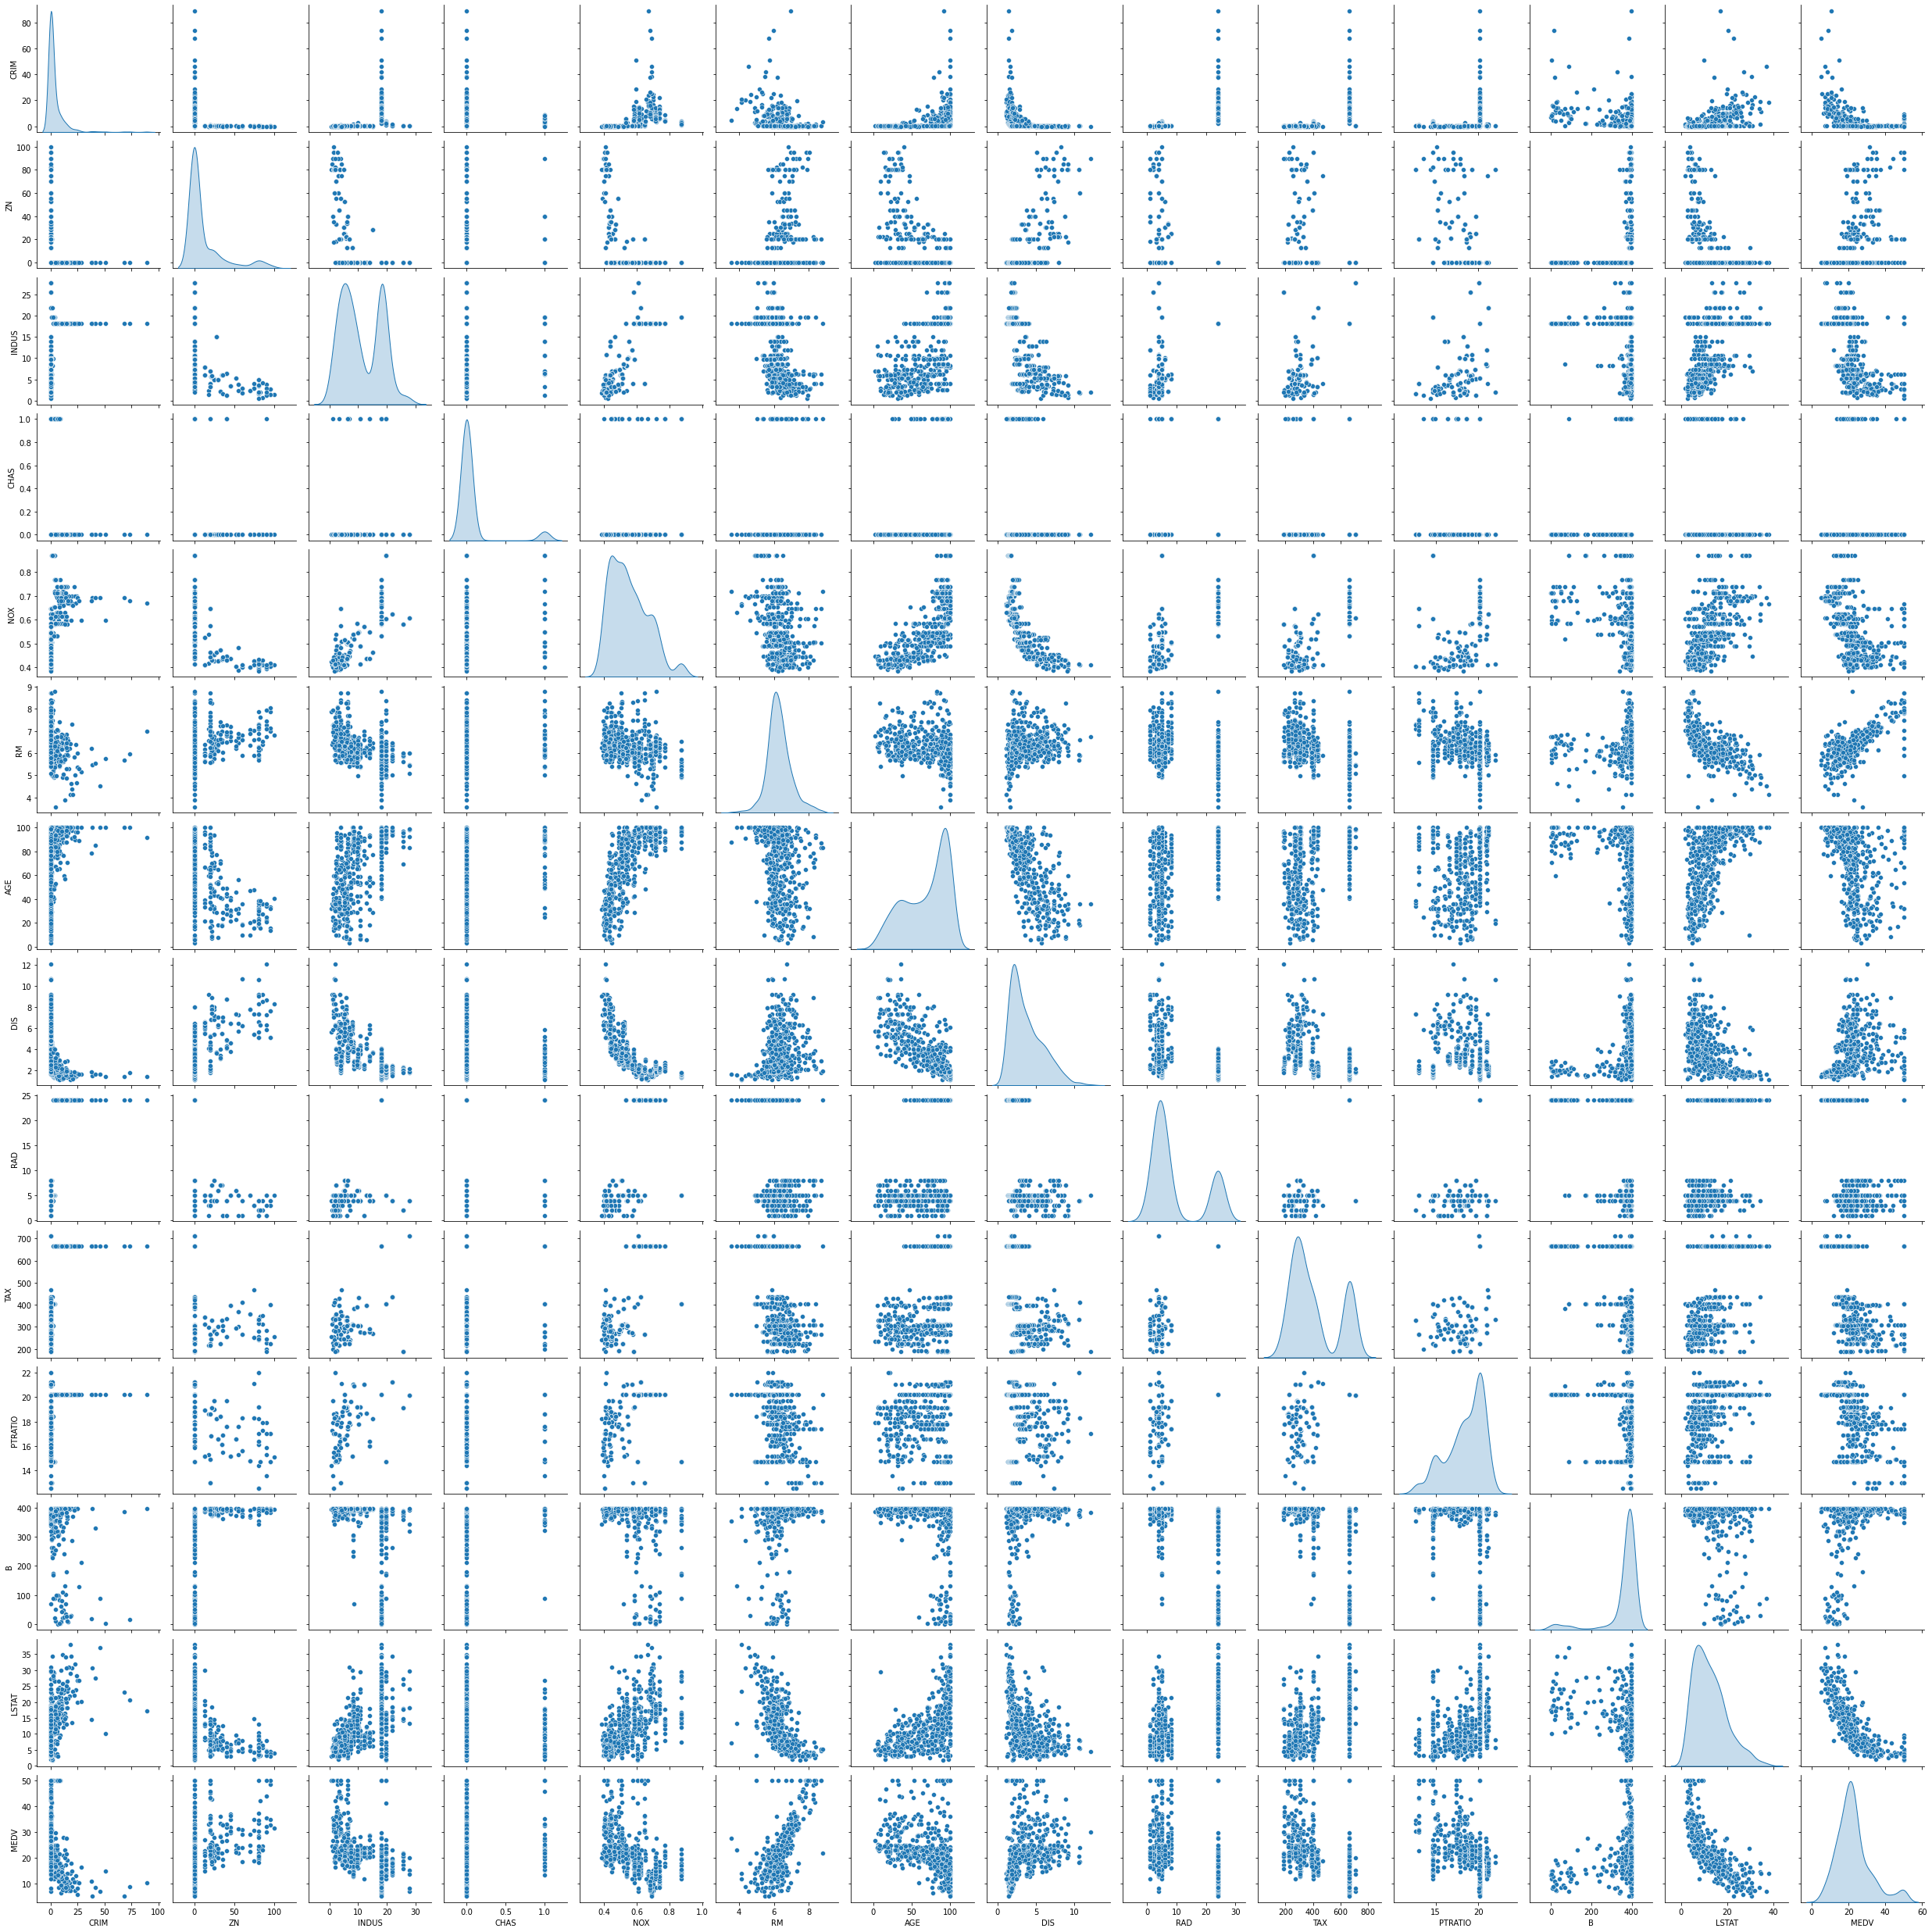

In [6]:
sns.pairplot(df, diag_kind="kde")

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Модель LinearRegression

In [8]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Coefficients: {model.coef_}')
print(f'Bias: {model.intercept_}')
print(f'Score: {model.score(X_test, y_test)}')

Coefficients: [[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
  -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
   2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
  -5.47113313e-01]]
Bias: [31.63108404]
Score: 0.7112260057484973


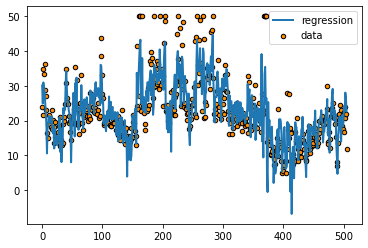

In [9]:
y_pred = model.predict(X)
plt.scatter(y.index, y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(y.index, y_pred, linewidth=2, label='regression')
plt.legend()

Применим стандартизацию (StandardScaler)

In [10]:
# model = make_pipeline(StandardScaler(), LinearRegression())
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Coefficients: {model.coef_}')
print(f'Bias: {model.intercept_}')
print(f'Score: {model.score(X_test, y_test)}')

Coefficients: [[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
  -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
  -3.88579002]]
Bias: [23.01581921]
Score: 0.7112260057484934


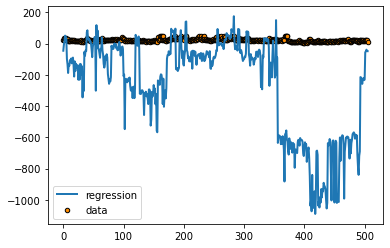

In [11]:
y_pred = model.predict(X)
plt.scatter(y.index, y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(y.index, y_pred, linewidth=2, label='regression')
plt.legend()

### Модель DecisionTreeRegressor

1. Без ограничения глубины дерева

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Score: 0.8444833592340152


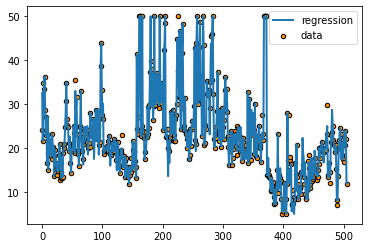

In [13]:
model_tree = DecisionTreeRegressor(random_state = 42)

model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)

print(f'Score: {model_tree.score(X_test, y_test)}')

y_pred = model_tree.predict(X)

plt.scatter(y.index, y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(y.index, y_pred, linewidth=2, label='regression')
plt.legend()

Визуализация дерева

воспользуемся онлайн-сервисом http://www.webgraphviz.com

Сгенерируем код дерева в формате .dot и скопируем его на сайт http://www.webgraphviz.com

In [14]:
from sklearn.tree import export_graphviz

print(export_graphviz(model_tree, out_file=None, filled=True))

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="X[5] <= 6.941\nmse = 87.897\nsamples = 354\nvalue = 23.016", fillcolor="#f5cdb0"] ;
1 [label="X[12] <= 14.4\nmse = 41.295\nsamples = 292\nvalue = 20.084", fillcolor="#f6d5bd"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[7] <= 1.385\nmse = 26.114\nsamples = 178\nvalue = 23.47", fillcolor="#f4cbae"] ;
1 -> 2 ;
3 [label="X[0] <= 10.109\nmse = 91.577\nsamples = 4\nvalue = 44.475", fillcolor="#e89051"] ;
2 -> 3 ;
4 [label="mse = 0.0\nsamples = 3\nvalue = 50.0", fillcolor="#e58139"] ;
3 -> 4 ;
5 [label="mse = -0.0\nsamples = 1\nvalue = 27.9", fillcolor="#f2bf9a"] ;
3 -> 5 ;
6 [label="X[5] <= 6.543\nmse = 14.233\nsamples = 174\nvalue = 22.987", fillcolor="#f5cdb0"] ;
2 -> 6 ;
7 [label="X[12] <= 7.76\nmse = 7.174\nsamples = 133\nvalue = 21.639", fillcolor="#f5d0b6"] ;
6 -> 7 ;
8 [label="X[0] <= 0.032\nmse = 2.279\nsamples = 25\nvalue = 23.776", fillcolor="#f4caac"] ;
7 -> 8 ;
9 [label="ms

2. Пример с различной глубиной дерева

Score: 0.6758436094969433
Score: 0.7435711616336518
Score: 0.7255536066517965
Score: 0.8507359013244257
Score: 0.742271437213551
Score: 0.8521798099098618


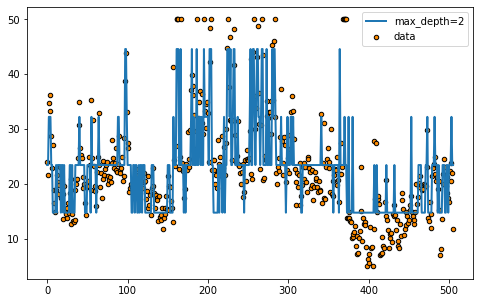

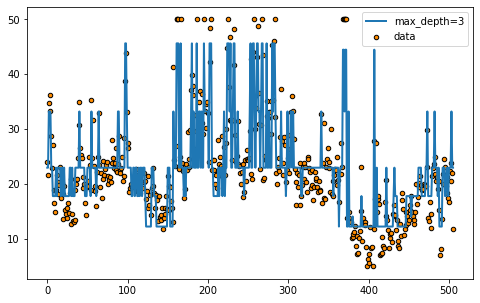

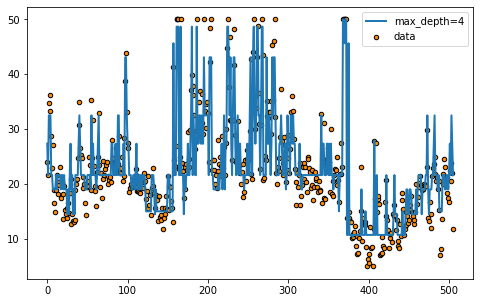

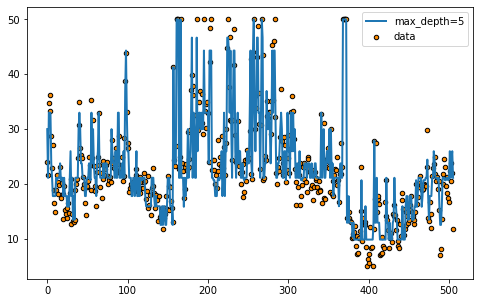

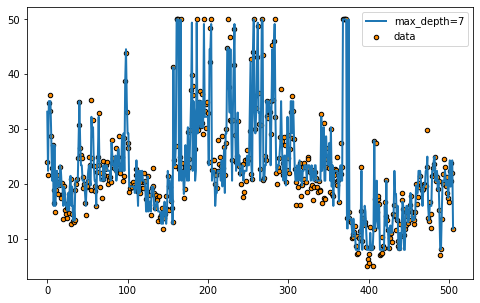

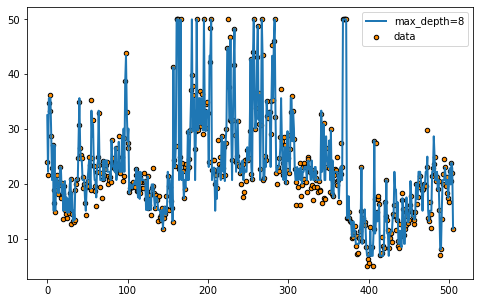

In [15]:
list_max_depth = [2,3,4,5,7,8]
# fig, ax = plt.subplots(3,2, figsize=(10,8))
for i in list_max_depth:
    model_tree = DecisionTreeRegressor(max_depth=i, random_state = 42)
    model_tree.fit(X_train, y_train)
    y_pred = model_tree.predict(X)
    
    plt.subplots(figsize=(8,5))
    plt.scatter(y.index, y, s=20, edgecolor="black",c="darkorange", label="data")
    plt.plot(y.index, y_pred, linewidth=2, label=f'max_depth={i}')
    plt.legend()
    print(f'Score: {model_tree.score(X_test, y_test)}')

3. Пример с различной глубиной дерева, критерием ошибки 'mae', min_samples_split=3

Score: 0.6861495255765244
Score: 0.7345455134352836
Score: 0.8227532509994944
Score: 0.751578460756912
Score: 0.8729329680564246
Score: 0.8369837944230927


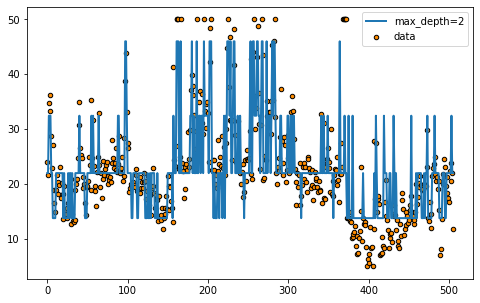

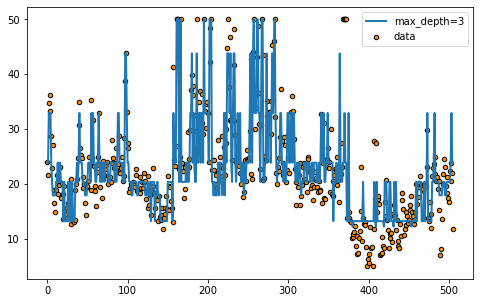

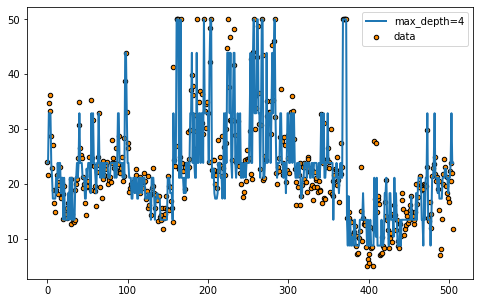

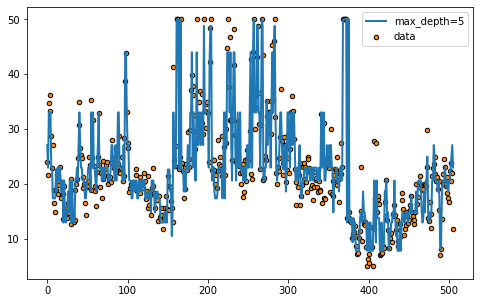

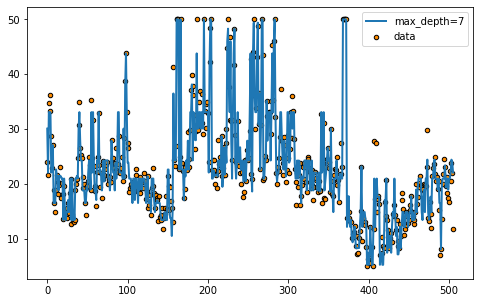

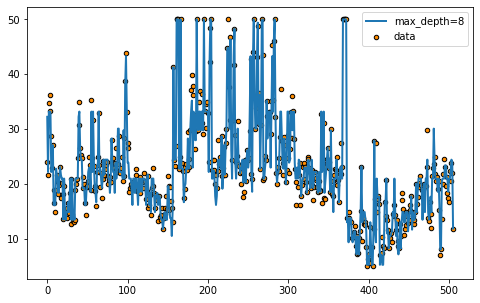

In [16]:
list_max_depth = [2,3,4,5,7,8]
# fig, ax = plt.subplots(3,2, figsize=(10,8))
for i in list_max_depth:
    model_tree = DecisionTreeRegressor(max_depth=i, criterion='mae', min_samples_split=3, random_state = 42)
    model_tree.fit(X_train, y_train)
    y_pred = model_tree.predict(X)
    
    plt.subplots(figsize=(8,5))
    plt.scatter(y.index, y, s=20, edgecolor="black",c="darkorange", label="data")
    plt.plot(y.index, y_pred, linewidth=2, label=f'max_depth={i}')
    plt.legend()
    print(f'Score: {model_tree.score(X_test, y_test)}')

Лучший результат регрессии дает модель DecisionTreeRegressor(max_depth=7, criterion='mae', min_samples_split=3, random_state = 42) с оцнкой Score: 0.8729329680564246.